In [4]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

import time
import sys
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import linear_model

#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=np.digitize(y,np.linspace(0, len(y), 150)),shuffle=True)


In [5]:
data = pd.read_csv("./Cleaned_Laptop_data.csv")

data

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,ASUS,Celeron,Intel,Celeron Dual,Missing,4,DDR4,0,1024,Windows,...,15.6,1,No,No,23990,26990,11,3.8,15279,1947
1,ASUS,VivoBook,Intel,Core i3,10th,8,DDR4,512,0,Windows,...,15.6,1,No,No,37990,50990,25,4.3,990,108
2,ASUS,Vivobook,Intel,Core i3,10th,8,DDR4,0,1024,Windows,...,14.1,1,No,No,32890,46990,30,3.9,28,4
3,HP,Core,Intel,Core i3,11th,8,DDR4,512,0,Windows,...,15.6,1,No,Yes,42990,57330,25,4.4,158,18
4,HP,Core,Intel,Core i5,11th,8,DDR4,512,0,Windows,...,15.6,0,No,No,54990,70171,21,4.2,116,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,DELL,Core,Intel,Core i3,10th,8,DDR4,256,1024,Windows,...,15.6,0,No,No,46390,59101,21,2.9,95,5
892,DELL,Core,Intel,Core i3,10th,8,DDR4,0,1024,Windows,...,14.96,0,No,No,40390,54992,26,3.2,83,15
893,HP,Pavilion,Intel,Core i5,8th,8,DDR4,128,0,Windows,...,13.3,1,No,No,76012,0,0,4.3,129,16
894,ASUS,Vivobook,Intel,Core i3,10th,4,DDR4,0,1024,Windows,...,14.1,0,No,No,33990,39990,15,3.4,31,6


In [6]:
data_numbers = data.select_dtypes(exclude=['object'])

i = list(data_numbers.columns)
i[i.index('reviews')], i[i.index('latest_price')] = i[i.index('latest_price')], i[i.index('reviews')]
data_numbers = data_numbers[i]

categorical_labels = [i for i in data.columns if data.dtypes[i]=="object"]
data_categorical = data[categorical_labels]

In [7]:
data_numbers

,ssd,hdd,os_bit,graphic_card_gb,warranty,reviews,old_price,discount,star_rating,ratings,latest_price
0,0,1024,64,0,1,1947,26990,11,3.8,15279,23990
1,512,0,64,0,1,108,50990,25,4.3,990,37990
2,0,1024,64,0,1,4,46990,30,3.9,28,32890
3,512,0,64,0,1,18,57330,25,4.4,158,42990
4,512,0,64,0,0,15,70171,21,4.2,116,54990
...,...,...,...,...,...,...,...,...,...,...,...
891,256,1024,64,0,0,5,59101,21,2.9,95,46390
892,0,1024,64,0,0,15,54992,26,3.2,83,40390
893,128,0,64,0,1,16,0,0,4.3,129,76012
894,0,1024,64,0,0,6,39990,15,3.4,31,33990


In [8]:
corr = data_numbers.corr()
corr

,ssd,hdd,os_bit,graphic_card_gb,warranty,reviews,old_price,discount,star_rating,ratings,latest_price
ssd,1.000000,-0.461789,0.233743,0.280814,0.204786,-0.183988,0.485562,0.106299,-0.120052,-0.178767,0.541658
hdd,-0.461789,1.000000,-0.014646,-0.080640,-0.049664,0.048527,-0.252141,-0.086074,0.037239,0.055294,-0.230422
os_bit,0.233743,-0.014646,1.000000,-0.139860,0.290472,-0.051371,-0.007944,0.037806,0.043147,-0.041343,-0.058389
graphic_card_gb,0.280814,-0.080640,-0.139860,1.000000,-0.042251,-0.042207,0.462580,0.045117,-0.013381,-0.044821,0.487809
warranty,0.204786,-0.049664,0.290472,-0.042251,1.000000,0.034957,0.051954,0.071675,0.093033,0.046686,0.039767
reviews,-0.183988,0.048527,-0.051371,-0.042207,0.034957,1.000000,-0.157942,-0.026205,0.220484,0.982179,-0.170354
old_price,0.485562,-0.252141,-0.007944,0.462580,0.051954,-0.157942,1.000000,0.219714,-0.075707,-0.147429,0.748372
discount,0.106299,-0.086074,0.037806,0.045117,0.071675,-0.026205,0.219714,1.000000,0.069302,-0.034152,-0.212207
star_rating,-0.120052,0.037239,0.043147,-0.013381,0.093033,0.220484,-0.075707,0.069302,1.000000,0.217302,-0.161925
ratings,-0.178767,0.055294,-0.041343,-0.044821,0.046686,0.982179,-0.147429,-0.034152,0.217302,1.000000,-0.164366


In [9]:
number_features = ['ssd', 'hdd', 'graphic_card_gb', 'old_price', 'latest_price']

In [10]:
data_categorical

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,os,weight,display_size,Touchscreen,msoffice
0,ASUS,Celeron,Intel,Celeron Dual,Missing,4,DDR4,Windows,Casual,15.6,No,No
1,ASUS,VivoBook,Intel,Core i3,10th,8,DDR4,Windows,Casual,15.6,No,No
2,ASUS,Vivobook,Intel,Core i3,10th,8,DDR4,Windows,Casual,14.1,No,No
3,HP,Core,Intel,Core i3,11th,8,DDR4,Windows,ThinNlight,15.6,No,Yes
4,HP,Core,Intel,Core i5,11th,8,DDR4,Windows,ThinNlight,15.6,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...
891,DELL,Core,Intel,Core i3,10th,8,DDR4,Windows,ThinNlight,15.6,No,No
892,DELL,Core,Intel,Core i3,10th,8,DDR4,Windows,ThinNlight,14.96,No,No
893,HP,Pavilion,Intel,Core i5,8th,8,DDR4,Windows,ThinNlight,13.3,No,No
894,ASUS,Vivobook,Intel,Core i3,10th,4,DDR4,Windows,ThinNlight,14.1,No,No


In [11]:
categorical_features = ['brand','model','processor_name','ram_gb','weight','display_size','Touchscreen','msoffice']

In [12]:
for i in categorical_features:
    data_dummies = pd.get_dummies(data_categorical[i],prefix=i)
    data_categorical = data_categorical.join(data_dummies)

binary_data = data_categorical.iloc[:,12:]
binary_data

,brand_ALIENWARE,brand_APPLE,brand_ASUS,brand_Avita,brand_DELL,brand_HP,brand_Infinix,brand_LG,brand_Lenovo,brand_MICROSOFT,...,display_size_16.2,display_size_17.3,display_size_6th,display_size_8th,display_size_All,display_size_ITW),Touchscreen_No,Touchscreen_Yes,msoffice_No,msoffice_Yes
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
892,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
893,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
894,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [13]:
new_df = data[number_features].join(binary_data)

new_df

,ssd,hdd,graphic_card_gb,old_price,latest_price,brand_ALIENWARE,brand_APPLE,brand_ASUS,brand_Avita,brand_DELL,...,display_size_16.2,display_size_17.3,display_size_6th,display_size_8th,display_size_All,display_size_ITW),Touchscreen_No,Touchscreen_Yes,msoffice_No,msoffice_Yes
0,0,1024,0,26990,23990,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,512,0,0,50990,37990,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,1024,0,46990,32890,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
3,512,0,0,57330,42990,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,512,0,0,70171,54990,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,256,1024,0,59101,46390,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
892,0,1024,0,54992,40390,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
893,128,0,0,0,76012,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
894,0,1024,0,39990,33990,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [14]:
i = list(new_df.columns)
i[i.index('msoffice_Yes')], i[i.index('latest_price')] = i[i.index('latest_price')], i[i.index('msoffice_Yes')]
new_df = new_df[i]

new_df

,ssd,hdd,graphic_card_gb,old_price,msoffice_Yes,brand_ALIENWARE,brand_APPLE,brand_ASUS,brand_Avita,brand_DELL,...,display_size_16.2,display_size_17.3,display_size_6th,display_size_8th,display_size_All,display_size_ITW),Touchscreen_No,Touchscreen_Yes,msoffice_No,latest_price
0,0,1024,0,26990,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,23990
1,512,0,0,50990,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,37990
2,0,1024,0,46990,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,32890
3,512,0,0,57330,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,42990
4,512,0,0,70171,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,54990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,256,1024,0,59101,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,46390
892,0,1024,0,54992,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,40390
893,128,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,76012
894,0,1024,0,39990,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,33990


In [15]:
train_data = new_df.iloc[0:700]
test_data = new_df.iloc[701:]
train_labels = train_data.latest_price
test_labels = test_data.latest_price

train_data.drop(['latest_price'], axis=1, inplace=True)
test_data.drop(['latest_price'], axis=1, inplace=True)

C:\Users\fchia\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<function matplotlib.pyplot.show(close=None, block=None)>

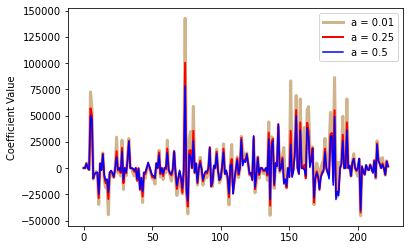

In [84]:
ridge_reg_1 = linear_model.Ridge(alpha=0.01)
ridge_reg_2 = linear_model.Ridge(alpha=0.25)
ridge_reg_3 = linear_model.Ridge(alpha=0.5)
ridge_reg_1.fit(train_data, train_labels)
ridge_reg_1.score(train_data, train_labels)
ridge_reg_2.fit(train_data, train_labels)
ridge_reg_2.score(train_data, train_labels)
ridge_reg_3.fit(train_data, train_labels)
ridge_reg_3.score(train_data, train_labels)
plt.plot(ridge_reg_1.coef_, color='tan', linewidth=3, label="a = 0.01")
plt.plot(ridge_reg_2.coef_,  color='red', linewidth=2, label="a = 0.25")
plt.plot(ridge_reg_3.coef_,  color='blue', label="a = 0.5")
plt.ylabel("Coefficient Value")
plt.legend()
plt.show

In [35]:
RR_test = ridge_reg.predict(test_data)
prediction = pd.DataFrame()
prediction['latest_price'] = RR_test
print(prediction)
print(test_labels)

      latest_price
0     87152.052196
1    100076.850915
2     36374.810144
3     92465.299489
4    128342.349515
..             ...
190   54785.204973
191   46755.193217
192   51243.768398
193   32698.387192
194   46569.702445

[195 rows x 1 columns]
701     80490
702    109190
703     43400
704    114990
705    129999
        ...  
891     46390
892     40390
893     76012
894     33990
895     39999
Name: latest_price, Length: 195, dtype: int64


In [34]:
avg = 0
for i,v in enumerate(test_labels):
    avg += abs(prediction.iloc[i].latest_price-v)/(prediction.iloc[i].latest_price+v)
    
avg = avg / 195
print(avg)

0.09144121157933642
